# Examples for the DLASystem Class (v1.0)

In [1]:
%matplotlib inline

In [2]:
# imports
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.isgm.dla import DLASystem, DLASurvey

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Simple Instantiate

In [3]:
dla = DLASystem((0.*u.deg, 0.*u.deg), 2.5, None, NHI=20.55)
dla

[DLASystem: 00:00:00 00:00:00, 2.5, NHI=20.55, Z/H=0]

## From a JXP .dat file 

(use of these .dat files is no longer recommended)

In [4]:
dla = DLASystem.from_datfile('Data/PH957.z2309.dat', tree=os.environ.get('DLA'))
dla

[DLASystem: 01:03:11.38 13:16:16.7, 2.309, NHI=21.37, Z/H=-1.41]

In [5]:
dla._datdict

OrderedDict([(u'QSO name', u'PH957'),
             (u'RA (2000)', u'01:03:11.38'),
             (u'DEC (2000)', u'+13:16:16.7'),
             (u'QSO zem', u'2.690000'),
             (u'flg_QSOmag', u'2'),
             (u'QSO Mag', u'16.600000'),
             (u'zabs', u'2.309000000'),
             (u'NHI', u'21.370'),
             (u'sig(NHI)', u'0.080 0.000'),
             (u'Abund file', u'Abund/PH957.z2309.clm'),
             (u'flg_Fe', u'1'),
             (u'[Fe/H]', u'-1.849'),
             (u'sig(Fe)', u'0.042'),
             (u'flg_Zn', u'1'),
             (u'[Zn/H]', u'-1.554'),
             (u'sig(Zn)', u'0.021'),
             (u'flg_Alpha', u'4'),
             (u'[Alpha/H]', u'-1.410'),
             (u'sig(Alpha)', u'0.010'),
             (u'flg_low', u'1'),
             (u'hi res file', u'/HIRES/RedData/PH957/PH957_f.fits'),
             (u'low_wav', u'1741.5490'),
             (u'low_vmn,vmx (2f7)', u'-25.0   80.0'),
             (u'fdelv', u'56.00'),
             (u'fmm',

### Load up ions

In [6]:
dla.tree

'/u/xavier/DLA/'

In [14]:
clm_fil = dla.tree+dla._datdict['Abund file']
print(clm_fil)
dla.get_ions(use_Nfile=True)

/u/xavier/DLA/Abund/PH957.z2309.clm


In [8]:
dla._ionN

Z,ion,A,Ej,z,vmin,vmax,flag_N,logN,sig_logN
,,,,,km / s,km / s,,,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64
6,1,0,0.0,2.309,-30.0,40.0,3,12.35,0.0
6,2,0,63.42,2.309,0.0,0.0,0,0.0,0.0
6,4,0,0.0,2.309,-50.0,120.0,1,13.255,0.028
8,1,0,0.0,2.309,-20.0,80.0,3,17.644,0.0
12,1,0,0.0,2.309,-20.0,40.0,1,12.338,0.132
13,3,0,0.0,2.309,-20.0,80.0,1,12.653,0.019
14,2,0,0.0,2.309,-33.0,90.0,2,14.595,0.247
14,4,0,0.0,2.309,-50.0,100.0,1,13.133,0.015


## Survey

In [9]:
dlas = DLASurvey.default_sample()

Read 100 files from Lists/Neeleman13.lst in the tree /u/xavier/DLA/


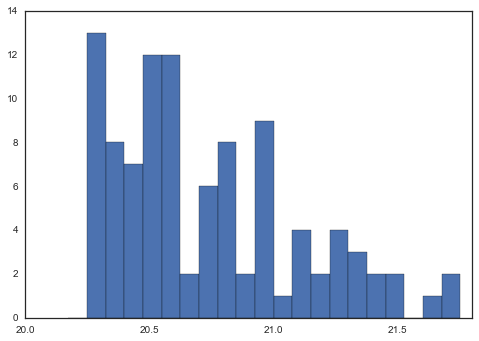

In [10]:
xdb.xhist(dlas.NHI)

In [13]:
dlas.fill_ions(use_Nfile=True)

In [12]:
CII_clms = dlas.ions((6,4))
CII_clms

name,Z,ion,A,Ej,z,vmin,vmax,flag_N,logN,sig_logN
,,,,,,km / s,km / s,,,
unicode32,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64
PSS0209+05_z3.666,6,4,0,0.0,3.6662,-100.0,10.0,1,13.385,0.02
PSS0209+05_z3.864,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
PSS0957+33_z3.280,6,4,0,0.0,3.27958,-200.280207364,79.7197926357,1,13.974,0.009
PSS0957+33_z4.180,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
HS1132+2243_z2.783,6,4,0,0.0,2.78347,-70.0,30.0,1,13.019,0.044
Q1209+0919_z2.584,6,4,0,0.0,2.5841,-300.0,300.0,2,14.999,0.066
Q1337+11_z2.796,6,4,0,0.0,2.79585,-90.0,20.0,1,13.387,0.026
PKS1354-17_z2.780,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [15]:
t = Table()

In [19]:
t2 = CII_clms[0:1].copy()

In [20]:
t2

name,Z,ion,A,Ej,z,vmin,vmax,flag_N,logN,sig_logN
,,,,,,km / s,km / s,,,
unicode32,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64
PSS0209+05_z3.666,6,4,0,0.0,3.6662,-100.0,10.0,1,13.385,0.02


In [21]:
from linetools import utils as ltu

In [22]:
ltu.v_from_z(1., 1.1)

NameError: global name 'const' is not defined